# Movie Analysis #
## Finding the most profitable genre ##

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Import DataFrame ###


In [514]:
movies = pd.read_csv('Cleaned Data/final_merged.csv')
movies.drop_duplicates(subset=['imdb_id'], inplace=True) # drop duplicate imdb_ids
print(movies.shape)
movies.head()

(2167, 15)


,Unnamed: 0,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
0,0,2010,8.3,65304,44639.0,tt1645089,Inside Job,['Documentary'],['Sony Pictures'],7.7,586.0,2000000,4311834.0,7799257.0,3.899629
1,1,2010,6.4,971,59015.0,tt1646127,Lights Out,"['Drama', 'Mystery', 'Thriller']","['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
2,2,2010,6.4,12,510578.0,tt1627937,The Journey,['Family'],"['QOA Entertainment', 'DesertRock Entertainment']",0.0,0.0,500000,19800.0,19800.0,0.039600
3,3,2010,5.5,22,313806.0,tt1636456,The Intern,['Drama'],[],0.0,0.0,40000000,75764672.0,197115710.0,4.927893
4,4,2010,6.2,843,64138.0,tt1636833,Black and White,['Drama'],[],5.5,5.0,10000000,5241315.0,5241315.0,0.524131


## Manipulate/Clean DataFrame for Analysis ##

In [515]:
# drop unnnamed column
movies = movies.drop(['Unnamed: 0'], axis = 1)

### .explode() on genre for Analysis ###

In [516]:
# check what an entry in genre column looks like
movies.genre[1]

"['Drama', 'Mystery', 'Thriller']"

The entries for genre are lists contained in strings. Before we can use the .explode() method, we must extract the lists out of the strings.

In [517]:
# convert object in genre column to list
movies.genre = movies.genre.apply(lambda x : x.strip('][').strip("'").split(', '))

In [518]:
# explode the dataframe in terms of genre
movies_explode = movies.explode('genre')
movies_explode.head()

,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
0,2010,8.3,65304,44639.0,tt1645089,Inside Job,Documentary,['Sony Pictures'],7.7,586.0,2000000,4311834.0,7799257.0,3.899629
1,2010,6.4,971,59015.0,tt1646127,Lights Out,Drama',"['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
1,2010,6.4,971,59015.0,tt1646127,Lights Out,'Mystery',"['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
1,2010,6.4,971,59015.0,tt1646127,Lights Out,'Thriller,"['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
2,2010,6.4,12,510578.0,tt1627937,The Journey,Family,"['QOA Entertainment', 'DesertRock Entertainment']",0.0,0.0,500000,19800.0,19800.0,0.039600


There are still some unnecessary apostrophes in the entries for genre. We'll remove those.

In [519]:
# remove unnecessary apostrophes
movies_explode.genre = movies_explode.genre.apply(lambda x : x.replace("'", ""))
movies_explode.head()

,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
0,2010,8.3,65304,44639.0,tt1645089,Inside Job,Documentary,['Sony Pictures'],7.7,586.0,2000000,4311834.0,7799257.0,3.899629
1,2010,6.4,971,59015.0,tt1646127,Lights Out,Drama,"['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
1,2010,6.4,971,59015.0,tt1646127,Lights Out,Mystery,"['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
1,2010,6.4,971,59015.0,tt1646127,Lights Out,Thriller,"['Diaphana Films', 'Région Ile-de-France', 'CN...",6.2,32.0,5000000,67268835.0,148806510.0,29.761302
2,2010,6.4,12,510578.0,tt1627937,The Journey,Family,"['QOA Entertainment', 'DesertRock Entertainment']",0.0,0.0,500000,19800.0,19800.0,0.039600


In [520]:
# find the number of unique genres in the dataframe (19 unique genres)
movies_explode.genre.value_counts()

Drama              1033
Comedy              614
Thriller            538
Action              471
Adventure           304
Romance             259
Horror              259
Crime               235
Science Fiction     209
Family              192
Fantasy             185
Mystery             140
Documentary         111
Animation           109
History              87
                     71
Music                58
War                  54
Western              24
Name: genre, dtype: int64

In [521]:
# drop all entries with '' as a genre
movies_explode = movies_explode[movies_explode.genre != '']
movies_explode.genre.value_counts()

Drama              1033
Comedy              614
Thriller            538
Action              471
Adventure           304
Romance             259
Horror              259
Crime               235
Science Fiction     209
Family              192
Fantasy             185
Mystery             140
Documentary         111
Animation           109
History              87
Music                58
War                  54
Western              24
Name: genre, dtype: int64

## Profit Analysis by Genre ##

In this section, we'll determine which genres make the most profit. Then, we will analyze how the profits for certain genres have changed over time. 

##  Most Profitable Genre ##

### Mean Profitability of Genres ###

This data set contains data on movie profits between 2010 - 2019. Unfortunately, the values for production_budget and total_gross are not adjusted for inflation. Therefore, examinining total_gross of a movie or genre can be misleading. It is best, then, to define profitability as the return on investment for a movie/genre. We define profitability as the ratio between total_gross and production_budget. This will give a profitability index that is consistent across all year and does not need to be adjusted for inflation. Below, we will analyze which genres have the highest profitability across all 9 years. 

In [522]:
# group by genre and find mean of the indicated columns
genre_profits_means = movies_explode.groupby('genre').mean().loc[ : , ['production_budget', 
                                                                       'domestic_gross', 
                                                                       'total_gross', 
                                                                       'profitability']]

In [523]:
# return highest mean profitability of all genres
bar1 = genre_profits_means.sort_values('profitability', ascending = False).reset_index()
bar1

,genre,production_budget,domestic_gross,total_gross,profitability
0,Horror,2.089414e+07,3.355740e+07,7.866892e+07,8.891247
1,Mystery,2.933316e+07,3.640420e+07,8.568897e+07,5.148720
2,Thriller,3.387138e+07,3.748826e+07,9.376570e+07,4.814398
3,Animation,9.327523e+07,1.259678e+08,3.502251e+08,4.416359
4,Family,8.208464e+07,1.067007e+08,2.832883e+08,4.054411
5,Science Fiction,8.445184e+07,1.021394e+08,2.773552e+08,3.886940
6,Romance,2.590604e+07,3.785415e+07,8.666628e+07,3.827473
7,Fantasy,9.347027e+07,1.061872e+08,2.979284e+08,3.795323
8,Drama,2.599682e+07,3.147977e+07,7.004255e+07,3.574073
9,Comedy,3.673038e+07,5.368016e+07,1.216948e+08,3.557474


Text(0, 0.5, 'Mean Profitability')

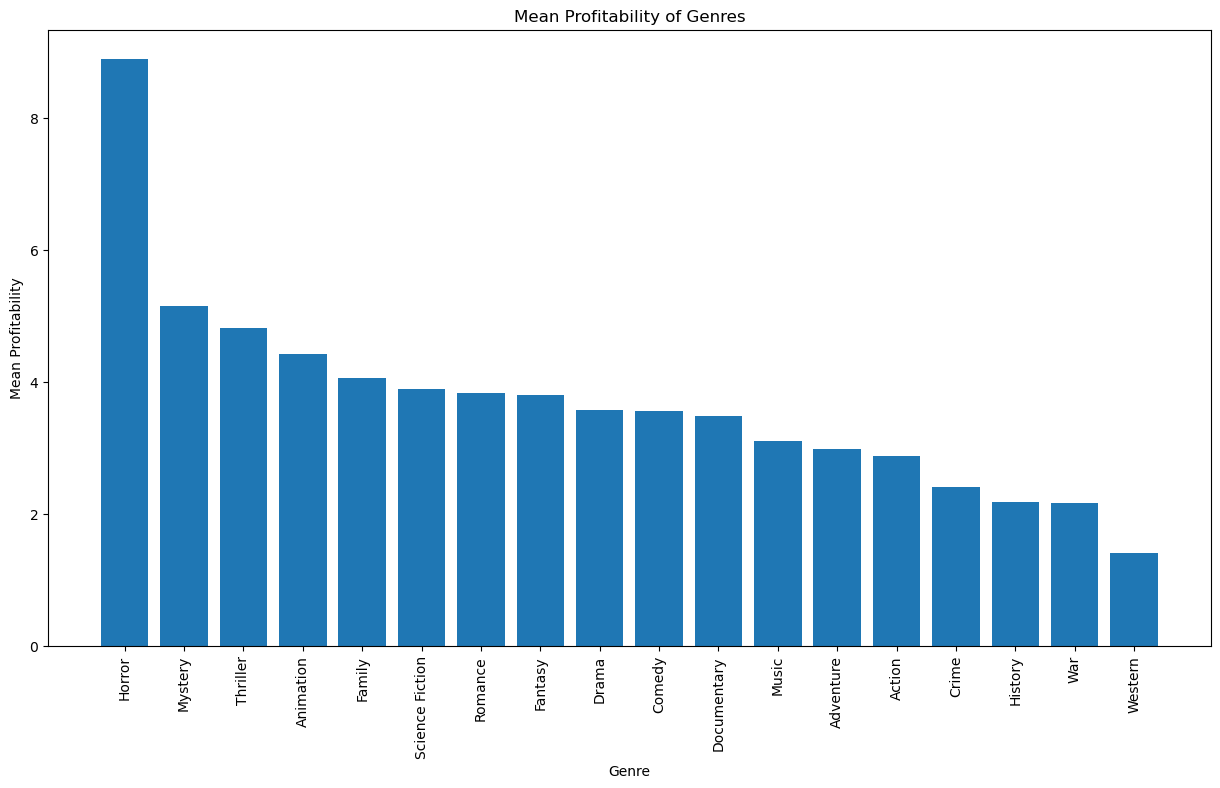

In [524]:
# create a bar plot for mean profitability by genre
plt.figure(figsize = (15, 8))
plt.bar(bar1.genre, bar1.profitability)
plt.title('Mean Profitability of Genres')
plt.xlabel('Genre')
plt.xticks(rotation = 'vertical')
plt.ylabel('Mean Profitability')

According to this bar graph, Horror would seem to be the most profitable genre with a profitability index of 9 (rounded up). The second most profitable is Mystery, but its profitability index of 5 is much smaller than for Horror. There must be a Horror movies with profitability indeces vastly larger than all other horror movies, raising the mean. Let's determine the shape of this distribution.

In [525]:
# determine which horror movie is the outlier
horror_movies = movies_explode[movies_explode.genre == 'Horror'].sort_values('profitability', ascending = False)
horror_movies.loc[ : , ['title', 'profitability']].head(10)

,title,profitability
1522,The Gallows,416.564740
727,The Devil Inside,101.759490
1542,Home,89.586336
26,Insidious,66.580591
1004,Unfriended,64.364198
227,Paranormal Activity 2,59.170677
1723,Split,55.792961
1899,Get Out,51.073590
588,Chernobyl Diaries,42.411721
463,Paranormal Activity 3,41.407969


Text(0, 0.5, 'Counts')

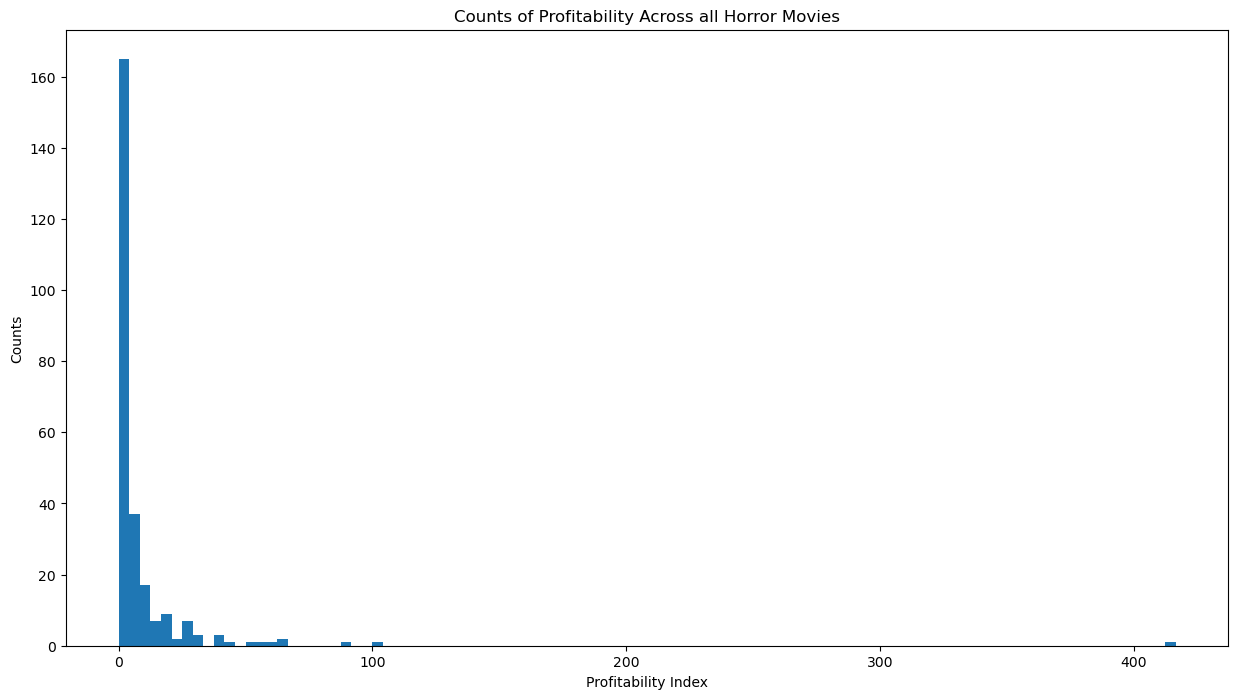

In [526]:
# plot a histogram to see the distribution of these values
plt.figure(figsize = (15, 8))
plt.hist(horror_movies.profitability, bins = 100);
plt.title('Counts of Profitability Across all Horror Movies')
plt.xlabel('Profitability Index')
plt.ylabel('Counts')

We can see that the Horror genre is extremely right skewed. Therefore, greatly increasing the value of the mean and giving an inaccurate picture of the true profitability of the Horror genre. Perhaps this is also the case for other genres as well. Median may be a better indicator to determine the profitability across genres.

### Median Profitablity of Genres ###

In [527]:
# group by genre and find the median of the indicated columns
genre_profits_medians = movies_explode.groupby('genre').median().loc[ : , ['production_budget', 
                                                                           'domestic_gross', 
                                                                           'total_gross', 
                                                                           'profitability']]

In [528]:
# return highest median profitability for all genres
bar2 = genre_profits_medians.sort_values('profitability', ascending = False).reset_index()
bar2

,genre,production_budget,domestic_gross,total_gross,profitability
0,Animation,80000000.0,100246011.0,274392649.0,2.994565
1,Horror,9900000.0,21222315.0,40520649.0,2.739747
2,Family,74000000.0,68615739.5,159464194.0,2.578068
3,Science Fiction,58000000.0,52000688.0,137551594.0,2.467320
4,Adventure,100000000.0,80085291.5,250795637.5,2.416596
5,Fantasy,80000000.0,56816662.0,173613482.0,2.358951
6,Comedy,22000000.0,32303727.5,54539920.0,2.293380
7,Mystery,20000000.0,25115260.5,41784385.5,2.247105
8,Action,50000000.0,43568507.0,105002056.0,2.178123
9,Romance,17000000.0,16376066.0,34247816.0,1.945704


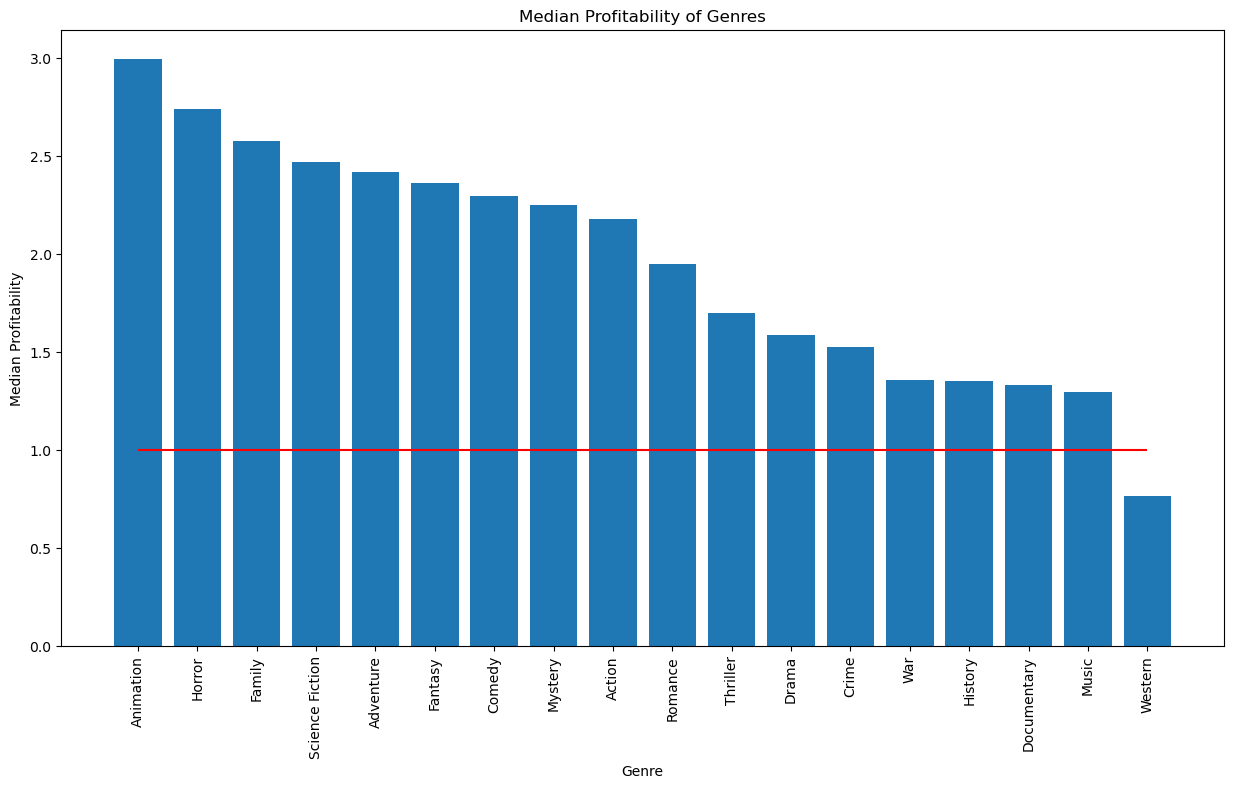

In [529]:
# create a bar plot for median profitability by genre
plt.figure(figsize = (15, 8))
plt.bar(bar2.genre, bar2.profitability)
plt.title('Median Profitability of Genres')
plt.xlabel('Genre')
plt.xticks(rotation = 'vertical')
plt.ylabel('Median Profitability')
plt.hlines(y = 1.0, xmin = 'Animation', xmax = 'Western', color = 'red')

The above figure shows the mean profitability acorss genres. The horizontal line represents a profitability index of 1. This is the profitability a movie must reach to break even (i.e no profit, no loss). According to this data set, the top 5 genres are Animation, Horror, Family, Science Fiction, and Adventure with the first 4 making at least 2.5 more money than what was initially invested. Western movies are the least profitable. In fact, this genre seems to be a bad investment overall as their profitability index is less than 1 meaning Western movies often lose money.

## Profitability of a Genre over Time ##

In this section, we'll analyze the profitability of a genre over time. Because a single high grossing movie can affect the mean profitability of a genre for a given year, we will be looking at median profitability per year over time.

In [530]:
# group data by year and genre and find median profitability and then unstack
grouped = movies_explode.groupby(['year', 'genre']).median().iloc[ : , -1].unstack()
grouped

genre,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,
2010,1.709365,2.239665,2.999218,1.831873,1.287381,2.193505,1.638845,2.411980,2.152316,0.636296,2.786324,0.555645,1.456278,2.053279,2.678543,1.923496,0.678778,0.584745
2011,1.945307,2.178123,2.838827,1.968919,1.807382,1.491668,1.807382,2.485517,2.257560,1.014633,1.407847,3.100865,2.768294,1.508189,2.587990,1.554199,0.212016,0.591021
2012,2.116558,2.997873,2.116558,1.973742,1.833633,1.477761,1.449074,2.098674,2.079535,1.716209,2.544963,1.133015,1.222526,2.054127,1.660864,1.833633,3.871562,3.295774
2013,2.186882,2.163173,2.627944,2.766780,1.412128,0.841538,1.484170,2.125160,2.451795,1.618292,3.317416,0.836169,2.399305,1.441051,2.384934,1.522675,3.867501,0.580232
2014,2.625566,3.245715,3.285496,2.433886,1.548721,0.658514,1.385818,2.465546,3.544982,1.799073,3.039099,0.108046,1.331341,1.716463,3.306725,1.361383,2.572379,0.269776
2015,2.245490,2.467320,2.649300,2.097094,0.856040,1.113019,1.732457,2.526178,2.097094,1.557610,2.739747,1.566793,1.496717,2.442555,2.589448,1.726968,1.185958,1.311420
2016,2.320263,2.706358,3.830064,2.742505,1.320950,1.586945,1.931046,2.991481,2.706358,0.817006,2.724573,1.615029,3.304730,1.945704,2.929905,1.657074,0.924732,2.468930
2017,2.186484,2.401454,3.292976,2.711384,2.994704,1.522388,1.401932,3.311987,3.282518,1.255808,2.358834,1.471090,3.944041,1.433118,1.964720,1.956445,1.615439,NaN
2018,2.072030,2.665471,4.441872,2.708203,1.571940,1.556036,1.780887,2.630270,2.649434,1.811393,5.754886,8.454025,1.736868,4.678876,3.714535,1.858263,0.737420,0.198995


The above data shows the change in profitabilty for each genre per year. In order to better see the trends in how their profitability changes over time, we'll create a lineplot for each genre. 

In [531]:
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [548]:
# create dictionaries to plot genre pforitability over time
x = list(grouped.index)
action = {'x' : x, 'y' : list(grouped['Action']), 'marker' : {'color' : 'blue'}, 'name' : 'Action'}
adventure = {'x' : x, 'y' : list(grouped['Adventure']), 'marker' : {'color' : 'orange'}, 'name' : 'Adventure'}
animation = {'x' : x, 'y' : list(grouped['Animation']), 'marker' : {'color' : 'green'}, 'name' : 'Animation'}
comedy = {'x' : x, 'y' : list(grouped['Comedy']), 'marker' : {'color' : 'red'}, 'name' : 'Comedy'}
crime = {'x' : x, 'y' : list(grouped['Crime']), 'marker' : {'color' : 'purple'}, 'name' : 'Crime'}
documentary = {'x' : x, 'y' : list(grouped['Documentary']), 'marker' : {'color' : 'brown'}, 'name' : 'Documentary'}
drama = {'x' : x, 'y' : list(grouped['Drama']), 'marker' : {'color' : 'fuchsia'}, 'name' : 'Drama'}
family = {'x' : x, 'y' : list(grouped['Family']), 'marker' : {'color' : 'navy'}, 'name' : 'Family'}
fantasy = {'x' : x, 'y' : list(grouped['Fantasy']), 'marker' : {'color' : 'yellow'}, 'name' : 'Fantasy'}
history = {'x' : x, 'y' : list(grouped['History']), 'marker' : {'color' : 'chartreuse'}, 'name' : 'History'}
horror = {'x' : x, 'y' : list(grouped['Horror']), 'marker' : {'color' : 'black'}, 'name' : 'Horror'}
music = {'x' : x, 'y' : list(grouped['Music']), 'marker' : {'color' : 'mediumpurple'}, 'name' : 'Music'}
mystery = {'x' : x, 'y' : list(grouped['Mystery']), 'marker' : {'color' : 'peru'}, 'name' : 'Mystery'}
romance = {'x' : x, 'y' : list(grouped['Romance']), 'marker' : {'color' : 'maroon'}, 'name' : 'Romance'}
scifi = {'x' : x, 'y' : list(grouped['Science Fiction']), 'marker' : {'color' : 'orangered'}, 'name' : 'Sci-Fi'}
thriller = {'x' : x, 'y' : list(grouped['Thriller']), 'marker' : {'color' : 'darkolivegreen'}, 'name' : 'Thriller'}
war = {'x' : x, 'y' : list(grouped['War']), 'marker' : {'color' : 'cyan'}, 'name' : 'War'}
western = {'x' : x, 'y' : list(grouped['Western']), 'marker' : {'color' : 'goldenrod'}, 'name' : 'Western'}

In [549]:
# time trend for profitability for the top 5 most profitable genresb
layout1 = {'title' : 'Change in Profitability Over Time for Top 6 Most Profitable Genres'}
trace1 = [animation, horror, family, scifi, adventure, fantasy]
figure1 = {'data' : trace1, 'layout' : layout1 }

plotly.offline.iplot(figure1)

###  General Trends for the Top 6 Most Profitable Genres ###

Profitability among all genres has varied wildly over the years. Most recently Animation, Horror, and Science Fiction saw good growth from 2017 - 2018. Adventure also saw growth during this period but it wasn't as great as the previously mentioned genres. However from 2018 - 2019, all these genres saw a significant decrease in profitability. Family and Fantasy films saw a stark decrease from 2017 - 2019. According to an article by Business Insider titled "The rise and fall of movie theaters — and how the coronavirus pandemic might change them," movie theatre admissions fell in 2017. Admissions rose again in 2018, but fell again in 2019. The data collected hear coincide with these larger trends.  

In [560]:
movies_explode[(movies_explode.year == 2018) & (movies_explode.genre == 'Horror')].sort_values('profitability', 
                                                                                                ascending = False).head()

,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
2063,2018,5.2,33621,460019.0,tt6772950,Truth or Dare,Horror,"['Blumhouse Productions', 'Universal Pictures']",6.0,2765.0,3500000,41411015.0,95127344.0,27.179241
2093,2018,7.6,305031,447332.0,tt6644200,A Quiet Place,Horror,"['Sunday Night', 'Platinum Dunes', 'Paramount']",7.3,8562.0,17000000,188024361.0,334522294.0,19.677782
2091,2018,5.7,42154,406563.0,tt5726086,Insidious: The Last Key,Horror,"['Stage 6 Films', 'Blumhouse Productions', 'So...",6.2,1798.0,10000000,67745330.0,167885588.0,16.788559
2138,2018,5.9,13822,505058.0,tt4761916,Unfriended: Dark Web,Horror,"['Universal Pictures', 'Bazelevs Production', ...",6.2,760.0,1000000,8866745.0,16434588.0,16.434588
2053,2018,7.2,74,605488.0,tt6840904,Monster,Horror,[],1.0,1.0,5000000,34469210.0,64240813.0,12.848163


2018 was a great year for horror movies. Of the 24 Horror movies of 2018 contained in our data set, 15 of those had a profitability index greater than 5. Of those 15, 7 of those had a profitability index of 10 or greater! In 2019, horror movie became the most profitable genre of the Top 6 Most Profitable Genres.

In [550]:
# time trend for profitability for the next 5 most profitable genresb
layout2 = {'title' : 'Change in Profitability Over Time for Middle 6 Profitable Genres'}
trace2 = [comedy, mystery, action, romance, thriller, drama]
figure2 = {'data' : trace2, 'layout' : layout2 }

plotly.offline.iplot(figure2)

### General Trends for Middle 6 Profitable Genres ###

The trends for the Middle 6 Profitable Genres coincide with the trends seen in with the Top 6 Most Profitable Genres. Comedy, Mystery, and Action movies saw decreases in profitability from 2017 - 2019. Romance and Drama movies saw an increase from 2017 - 2018, and a decrease from 2018 - 2019, as expected given the larger trends in the movie industry. Interestingly, profitability in Thriller movies has seen a steady increase in profitibility since 2004.

In [564]:
movies_explode[(movies_explode.year == 2018) & (movies_explode.genre == 'Romance')].sort_values('profitability', 
                                                                                                ascending = False).head()

,year,imdb_rating,imdb_numvotes,tmdb_id,imdb_id,title,genre,studio,tmdb_rating,tmdb_num_votes,production_budget,domestic_gross,total_gross,profitability
2037,2018,5.8,244,484427.0,tt8161226,All You Need Is Love,Romance,"['NL Film en TV', 'Talpa Fictie', 'RTL Enterta...",7.0,6.0,300000,0.0,3565259.0,11.884197
2056,2018,6.1,18728,502682.0,tt6857166,Book Club,Romance,['June Pictures'],6.1,471.0,10000000,68566296.0,91113683.0,9.111368
2136,2018,7.0,96617,455207.0,tt3104988,Crazy Rich Asians,Romance,"['Color Force', 'Ivanhoe Pictures', 'Warner Br...",7.1,2289.0,30000000,174532921.0,238099711.0,7.936657
2009,2018,5.9,25607,454619.0,tt1563742,Overboard,Romance,"['Pantelion Film', '3Pas Studios', 'Metro-Gold...",6.6,871.0,12000000,50316123.0,85369830.0,7.114152
2132,2018,4.5,43893,337167.0,tt4477536,Fifty Shades Freed,Romance,"['Universal Pictures', 'Perfect World Pictures']",6.5,5310.0,55000000,100407760.0,371350619.0,6.751829


2018 was also a really good year of Romance movies. Of the 15 Romance movies of 2018 in our data set, 12 of those had a higher profitability index than the second largest median profitability of genres in the same category. 

In [551]:
# time trend for profitability for the next 5 most profitable genresb
layout3 = {'title' : 'Change in Profitability Over Time for 6 Least Profitable Genres'}
trace3 = [crime, war, documentary, history, music, western]
figure3 = {'data' : trace3, 'layout' : layout3 }

plotly.offline.iplot(figure3)

### General Trends for 6 Least Profitable ###

Unlike the other genre groups described above, the trends in the 6 Least Profitable Genres are much more varied. Music and History movies show the expected trend of an increase in profitability from 2017 - 2018, and a decrease in profits from 2018 - 2019. Crime movies profitability decreased from 2017 - 2019. War movies profitability has has been steadily decreasing since 2013. In fact, median profitability to War movies in 2018 and 2019 were less than 1, mean that many War movies actually had lost money. Documentary movies have seen an increase in profitability from 2014 - 2019. Though growth slowed from 2016 - 2019. Western movies seem to often return profitability less than 1, indicating a loss in money. Though our data set does not contain Western movies for 2017, a quick Google search shows that the highest rated Western movie for 2017, *Hostiles*, had a budget of 39 million dollars but only made 35.7 million dollars at the boxes office. Coinciding with the trend of Western movies having a profitability index of less than 1. 

# Conclusions #

The data shows that in general, profitbility has decreased across most genres from 2018 - 2019. This coincides with the fall of movie admission from 2018 - 2019. With streaming services, increasingly making their own blockbust movies, the movie industry is seeing a shift in how people are watching movies. This downward trend may continue after 2020 as the coronavirus pandemic has led to closures of many movie theatres around the country. That being said, based on our data a new studio should try and produce either a Romance or Horror movie since thes movies ended 2019 with a profitability index greater than 3. On the other hand, a new studio may want to produce a Thriller or Documentary film since these genres have seen steady increases in protfitability over the last few years.